**Import Libraries**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

**Load Dataset**

In [60]:
df=pd.read_csv("crime_data.csv")
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


**EDA**

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [62]:
df1=df.drop(['Unnamed: 0'],axis=1)
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# H-clustering

**Normalizing The Values**

In [63]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [64]:
df1_norm = norm_func(df1)
df1_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [65]:
from sklearn.preprocessing import MinMaxScaler
trans=MinMaxScaler()
df2_norm=pd.DataFrame(trans.fit_transform(df1_norm))
df2_norm

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


**Dendogram**

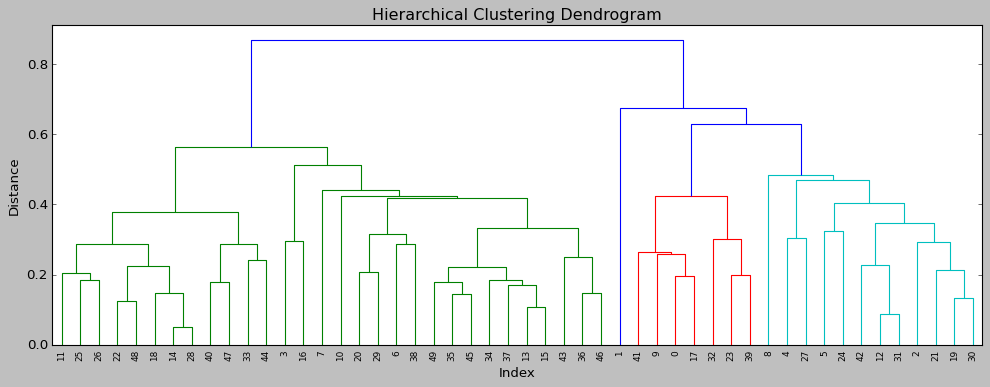

In [66]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(df1_norm, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

**As Dendogram Is Complicated To Understand We Go For Another Clustering Model**

# KMeans Clustering

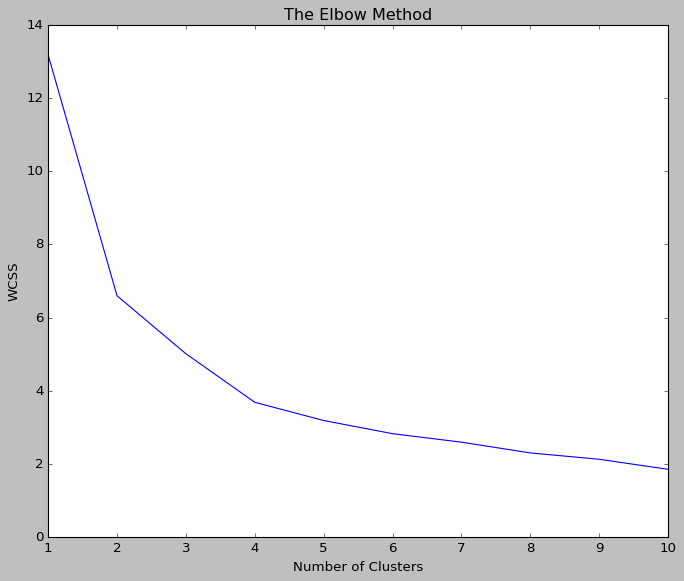

In [67]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(df1_norm)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()

In [68]:
clf = KMeans(n_clusters=5)
kmeans = clf.fit_predict(df1_norm)
kmeans

array([3, 0, 0, 2, 0, 0, 4, 2, 0, 3, 4, 1, 0, 2, 1, 2, 2, 3, 1, 0, 4, 0,
       1, 3, 2, 1, 1, 0, 1, 4, 0, 0, 3, 1, 2, 2, 2, 4, 4, 3, 1, 3, 0, 4,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [69]:
clf.labels_

array([3, 0, 0, 2, 0, 0, 4, 2, 0, 3, 4, 1, 0, 2, 1, 2, 2, 3, 1, 0, 4, 0,
       1, 3, 2, 1, 1, 0, 1, 4, 0, 0, 3, 1, 2, 2, 2, 4, 4, 3, 1, 3, 0, 4,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [70]:
clf.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.13805221, 0.10616438, 0.34039548, 0.1171404 ],
       [0.37700803, 0.36957763, 0.56073446, 0.35400517],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.2383821 , 0.268591  , 0.84503632, 0.2266519 ]])

In [71]:
clf.inertia_

3.1850219324724334

In [72]:
df3=pd.Series(kmeans)  # converting numpy array into pandas series object 
df['clust']=df3 # creating a  new column and assigning it to new column 
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [73]:
df.iloc[:,1:].groupby(df.clust).mean() 

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,10.966667,264.000000,76.500000,33.608333,0.0
1,3.091667,76.000000,52.083333,11.833333,1.0
2,7.058333,152.916667,65.083333,21.000000,2.0
3,14.671429,251.285714,54.285714,21.685714,3.0
4,4.757143,123.428571,81.857143,16.071429,4.0


Text(0.5, 1.0, 'Clusters using KMeans')

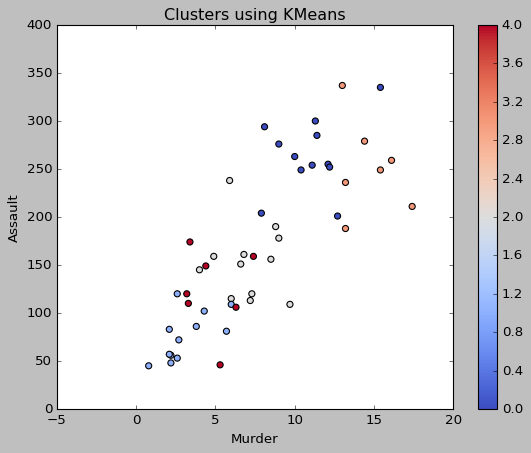

In [74]:
plt.style.use(['classic']) 
df.plot(x="Murder",y ="Assault",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')

In [75]:
WCSS

[13.184122550256445,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859143,
 3.1850219324724334,
 2.8251685682538032,
 2.5931751132398446,
 2.2987325830070953,
 2.1254423064408954,
 1.8509002461435178]

# DBSCAN Clustering

In [76]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(df1)
X=stscaler.transform(df1) 
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

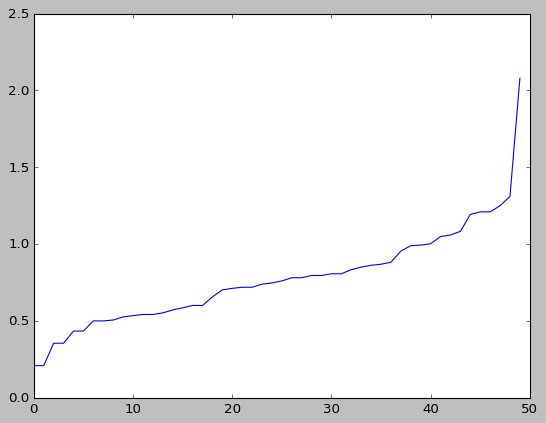

In [77]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [79]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan.fit(X) 

DBSCAN(eps=1)

In [80]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  1, -1,  0, -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0,
        0,  0,  0,  0,  1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0])

In [82]:
# Adding clusters to dataset
df1['clusters']=dbscan.labels_
df1

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


Text(0.5, 1.0, 'Clusters using DBScan')

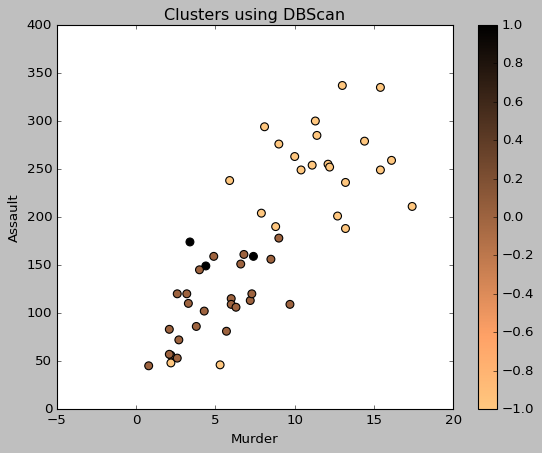

In [84]:
import matplotlib.pyplot as plt
plt.style.use('classic')
df1.plot(x="Murder",y ="Assault",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')

**From DBSCAN Clustering We can Identify The Clusters & Can Handle Noise Points**